# **Sujet 7 :  Etude des caractéristiques du noyau cellulaire pour le diagnostic du cancer du sein**
# Participant:

*   **Berlyse Dafna SOFACK KENFACK**
*   **Badiane Maimouna NDEYE**
*   ***Clara VAN CAUTER ***



 Le cancer du sein constitue l'une des principales causes de mortalité chez les femmes à travers le monde. Son diagnostic précoce joue un rôle crucial dans l’amélioration du pronostic et la survie des patientes. Dans cette optique, l’analyse des caractéristiques morphologiques des noyaux
 cellulaires, obtenues a partir de biopsie a l’aiguille fine (BAF) de masses mammaires, représente
 une méthode prometteuse pour affiner les techniques de diagnostic assisté par ordinateur. L’objectif de cette étude est donc de mieux comprendre les attributs morphologiques associés aux
 tumeurs bénignes et malignes, et d’évaluer leur pertinence pour le diagnostic automatisé du cancer
 du sein: Comprendre les différences des caractéristiques entre tumeurs bénignes et malignes.

Évaluer la pertinence de ces caractéristiques pour un diagnostic assisté par ordinateur.



Librairies utilisées

In [ ]:
import numpy as np
import pandas as pd #pour l'analyse des données
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
from sklearn import preprocessing
import warnings


Analyse de données :
# 1. Compréhension et organisation de nos données

In [ ]:
fichier_data = 'wdbc.data'
fichier_name= 'wdbc.names'

df = pd.read_csv(fichier_data)
print(df.head(10))




     842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4    843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
5    844359  M  18.25  19.98  119.60  1040.0  0.09463  0.10900  0.11270   
6  84458202  M  13.71  20.83   90.20   577.9  0.11890  0.16450  0.09366   
7    844981  M  13.00  21.82   87.50   519.8  0.12730  0.19320  0.18590   
8  84501001  M  12.46  24.04   83.97   475.9  0.11860  0.23960  0.22730   
9    845636  M  16.02  23.24  102.70   797.8  0.08206  0.06669  0.03299   

    0.1471  ...  25.38  17.33   184.6    2019  0.1622  0.6656  0.7119  \
0  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
1  0.12790  ...  23.57  25.5

In [ ]:

#on attribue à chaque colonne sa signification d'après les données afin de faciliter l'analyse
columns = [
    'id','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1',
    'symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2',
    'symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3',
    'symmetry3','fractal_dimension3',
]
# Lecture du fichier avec les noms de chaque données des colonnes
df = pd.read_csv("wdbc.data", header=None, names=columns)

# Afficher les 10 premières lignes
print(df.head(10))

         id Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   
5    843786         M    12.45     15.70       82.57   477.1      0.12780   
6    844359         M    18.25     19.98      119.60  1040.0      0.09463   
7  84458202         M    13.71     20.83       90.20   577.9      0.11890   
8    844981         M    13.00     21.82       87.50   519.8      0.12730   
9  84501001         M    12.46     24.04       83.97   475.9      0.11860   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760     0.30010          0.14710  ...    25.38     17.33   
1       

In [ ]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [ ]:
df.describe()

,id,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


2. Prétraitement des données
*   Suppression de la colonne id car elle represente l'identifiant unique du patient et ne nous sera pas utile pour l'analyse des données cancer
*   Encodage de diagnosis (B=0, M=1) : c'est la variable cible du problème de classification :


*   Diagnosis = B	Bénigne (non cancéreux)
*   Diagnosis = M	Maligne (cancéreux)

In [ ]:
#suppression des colonnes inutiles pour l'analyse comme id representant l'identifiant patient n'étant pas utile pour l'analyse de données
df.drop('id',axis=1,inplace=True)
df.Diagnosis=df.Diagnosis.map({'M':1, 'B':0})

#transforme la variable diagnosis : M (maligne) en  1 et B (benigne) en  0

df.head(10) #affiche les 10 premières lignes du fichier nettoyé

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# 2. Analyse exploratoire afin de Comprendre visuellement les données .

L'analyse exploratoire met en évidence une corrélation forte entre certaines variables, notamment les mesures de forme du noyau cellulaire (rayon, concavité, etc.).
La variable cible Diagnosis est liée positivement à plusieurs de ces mesures, ce qui confirme leur pertinence pour le diagnostic automatique du cancer du sein.
Les visualisations (histogrammes, boxplots, matrice de corrélation) facilitent la compréhension structurelle du dataset et la préparation de modèles fiables.
Pour la suite on verra:
-Statistiques descriptives (moyenne,
écart-type par classe)
-Visualisations :
lin plots pour comparer les distributions
-Heatmap de corrélation
-PCA / t-SNE pour visualiser la séparabilité
-Boxplots / vio

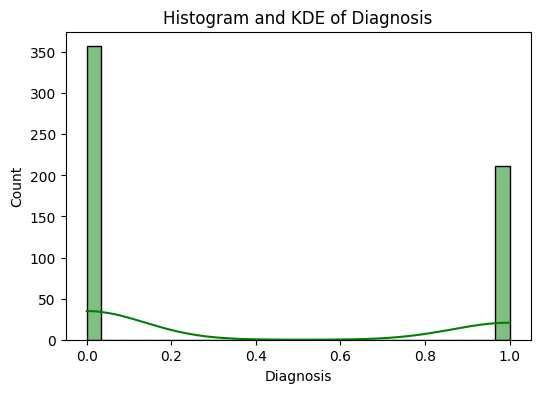

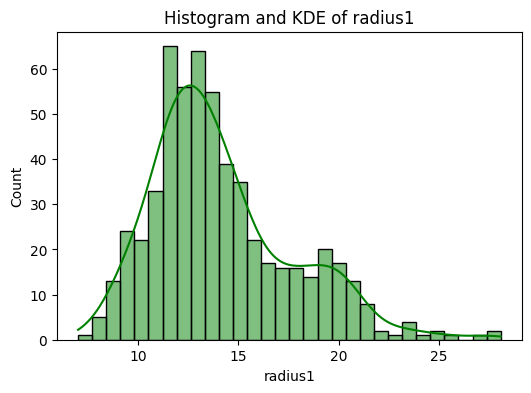

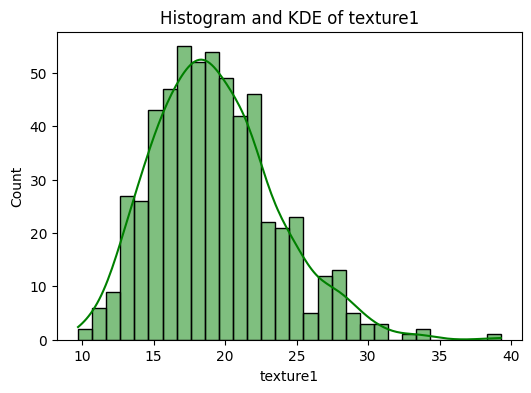

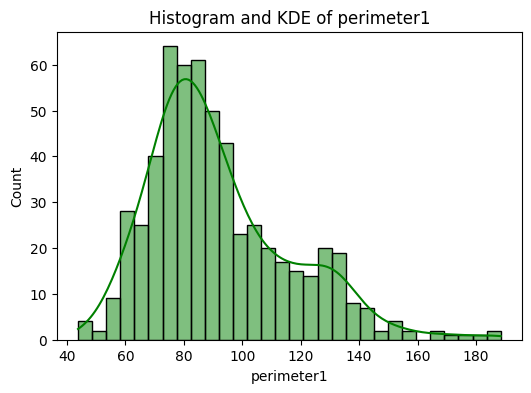

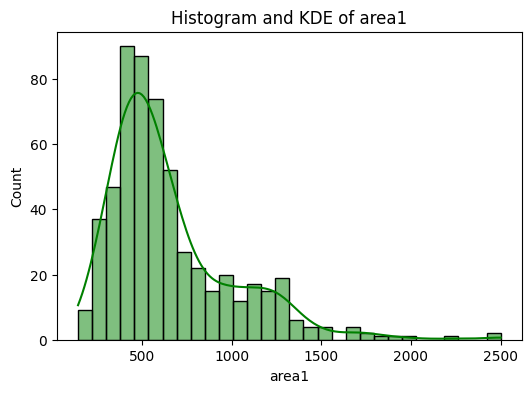

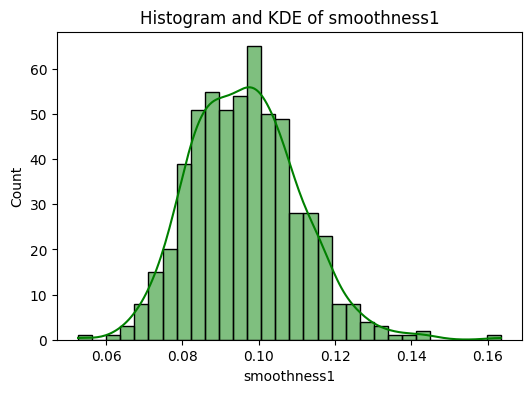

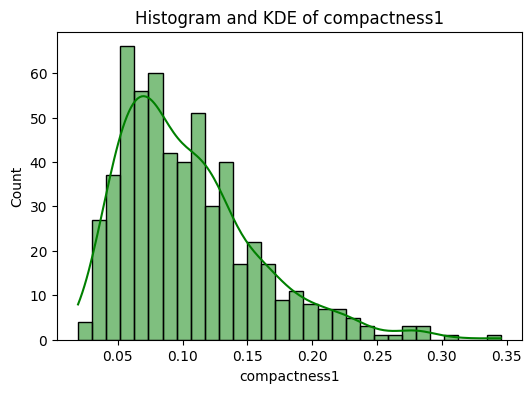

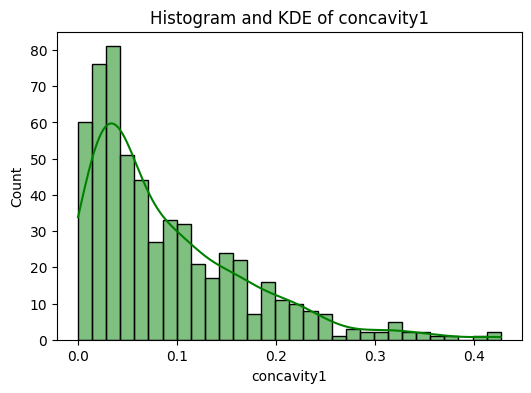

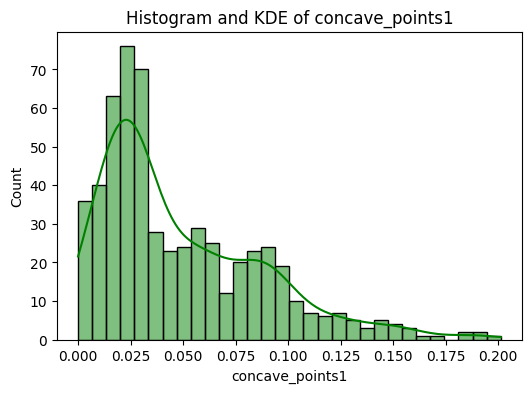

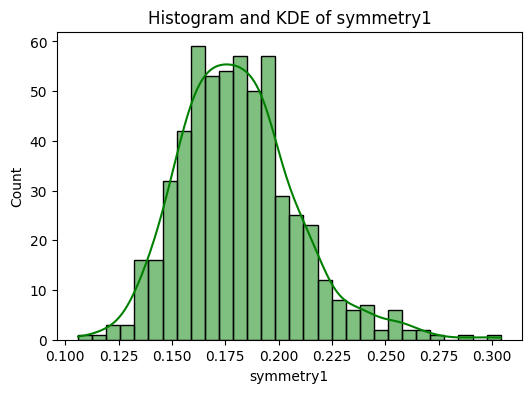

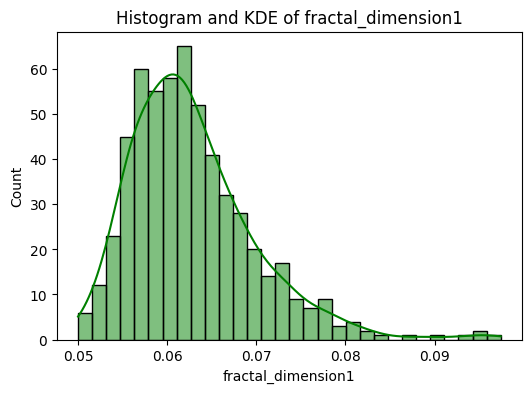

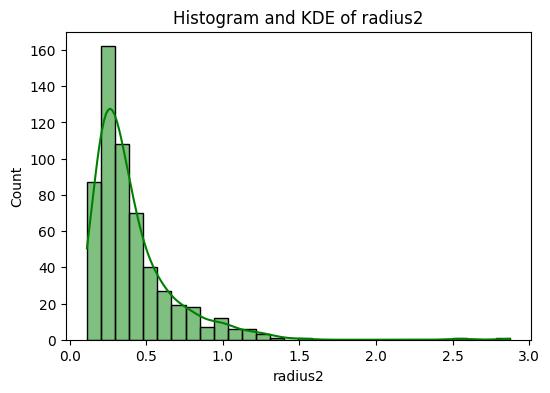

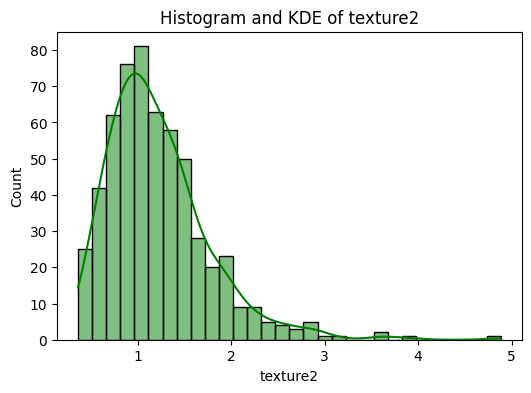

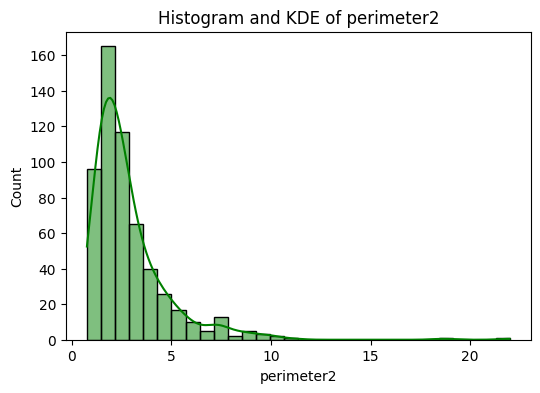

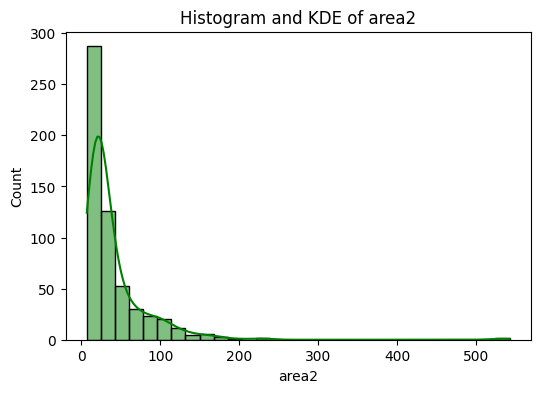

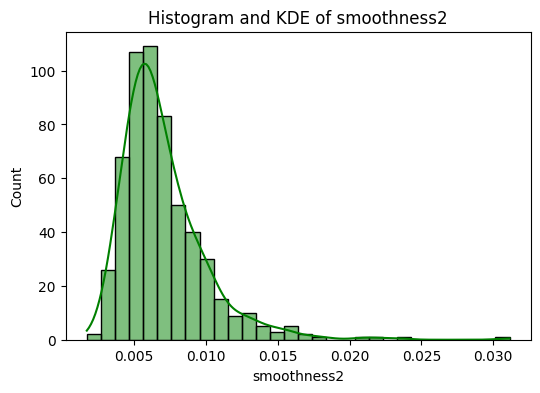

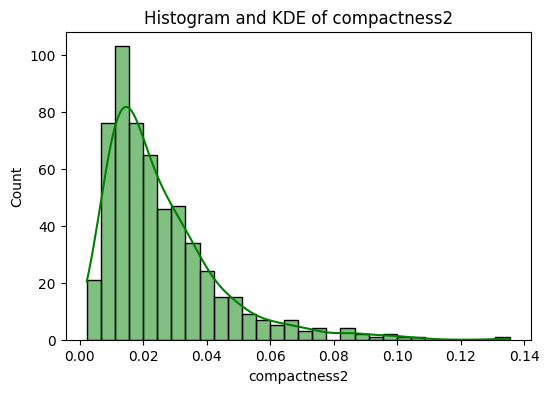

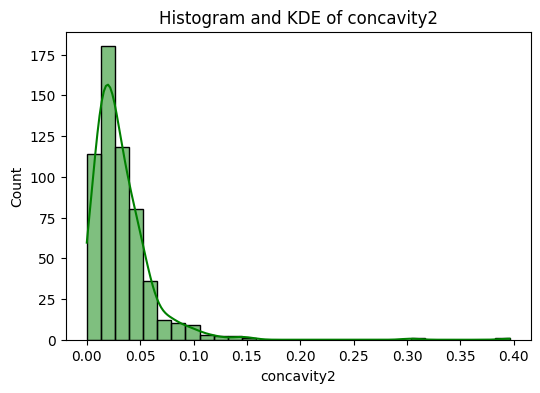

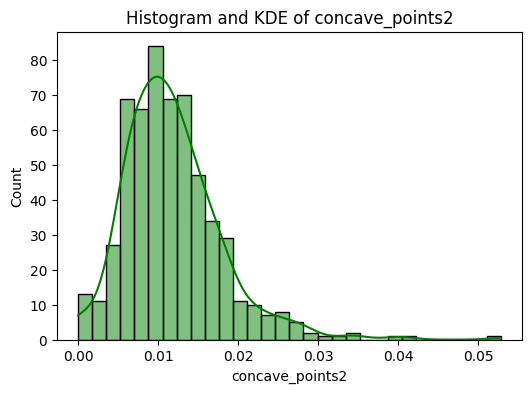

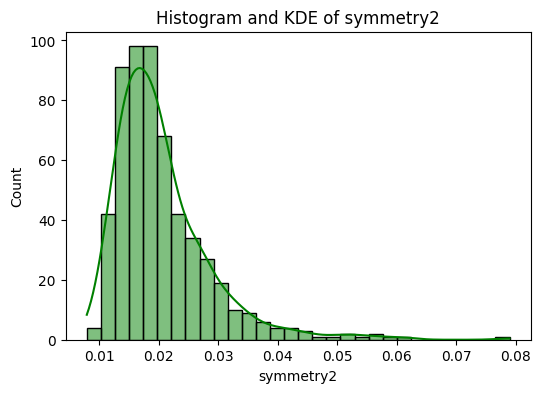

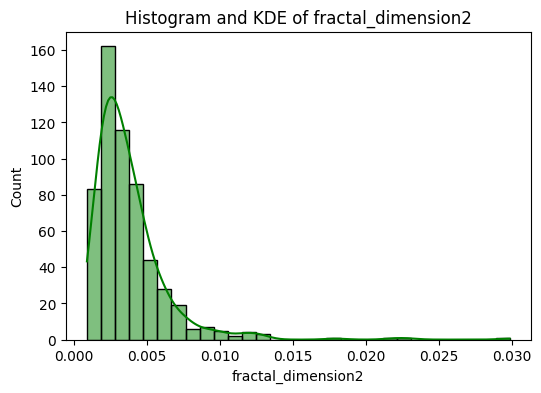

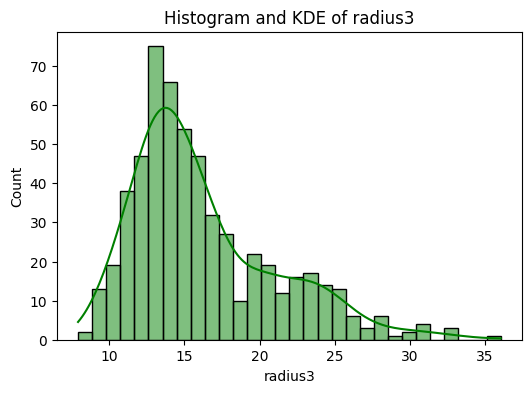

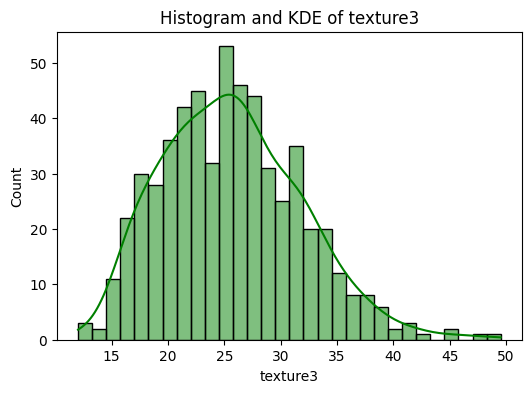

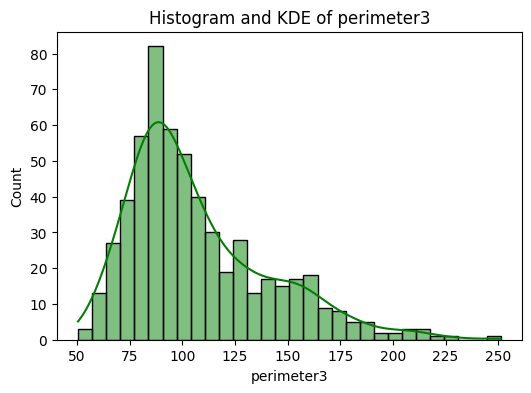

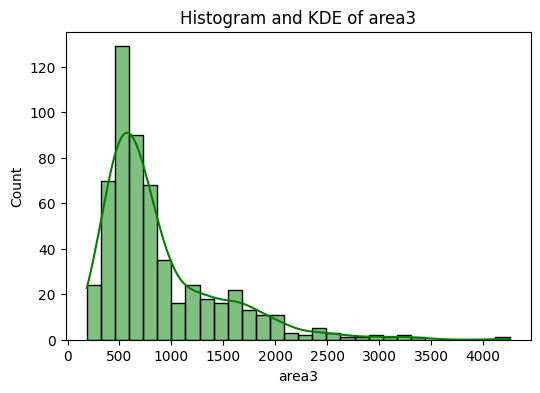

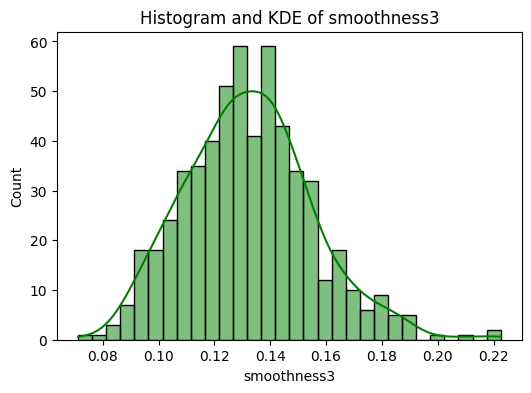

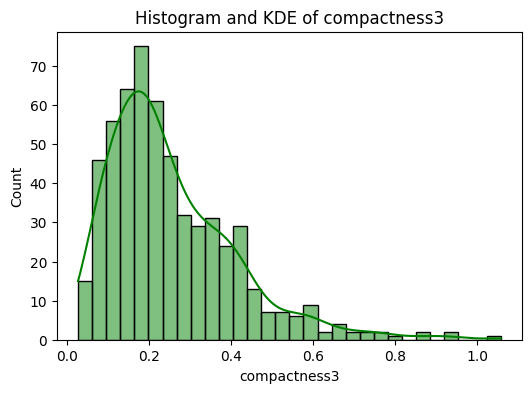

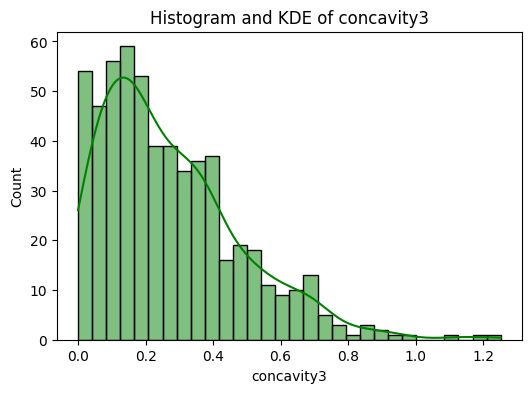

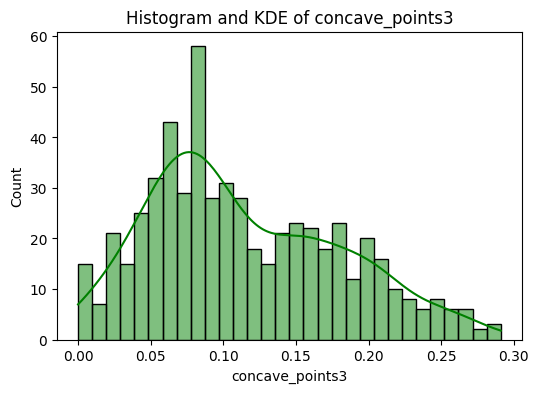

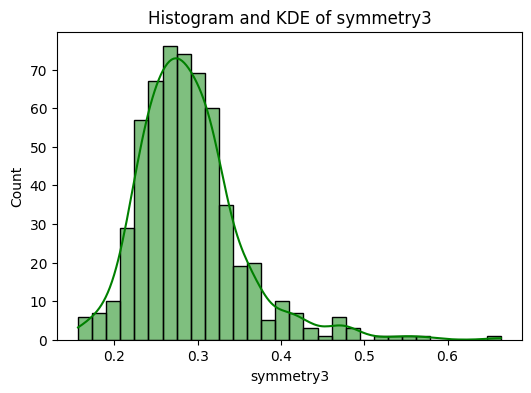

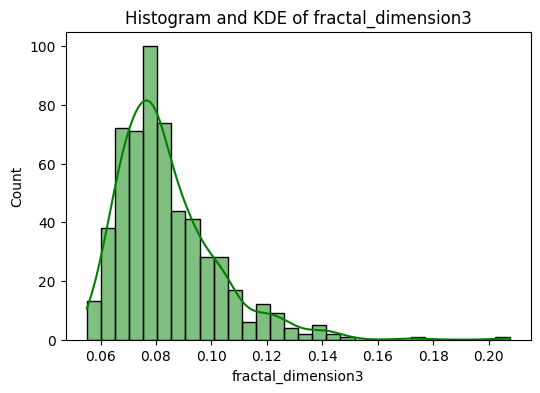

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col],kde=True,bins=30,color='green')
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

Les histogrammes accompagnés des courbes KDE permettent de visualiser la distribution des données pour chaque variable.

On observe que certaines variables comme radius1, area1, concavity1 sont asymétriques, ce qui suggère une distribution non gaussienne. Cela peut influencer certains modèles sensibles à la normalité.
Ces graphiques sont utiles pour repérer :
les valeurs extrêmes (outliers)
les variables bimodales.
les variables à forte asymétrie.

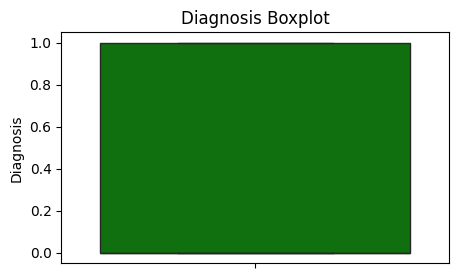

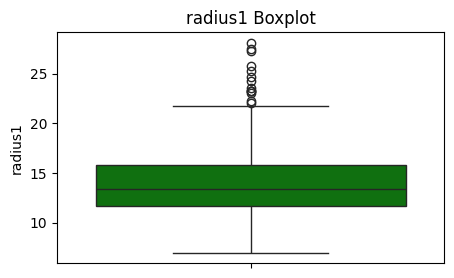

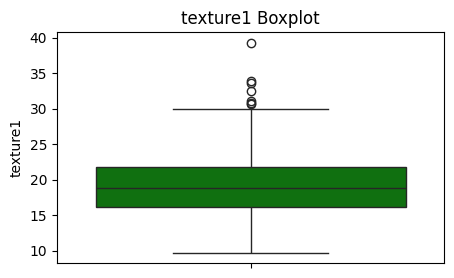

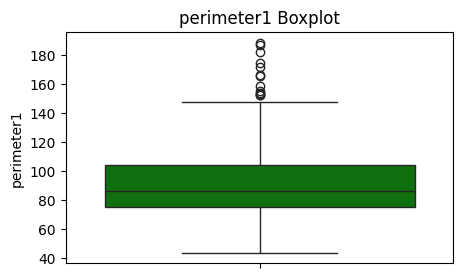

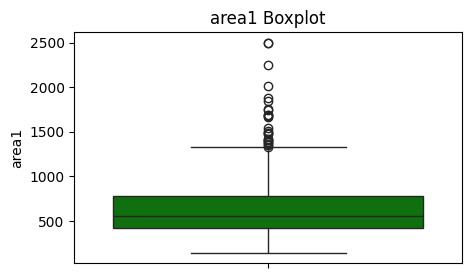

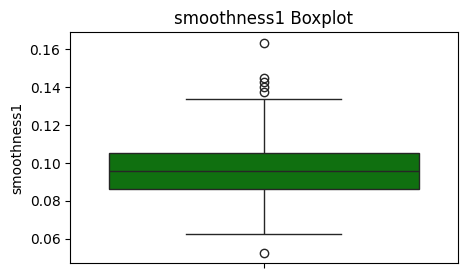

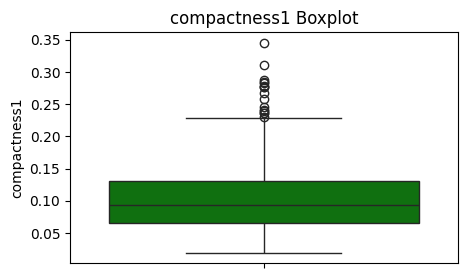

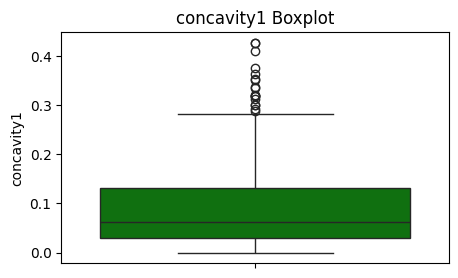

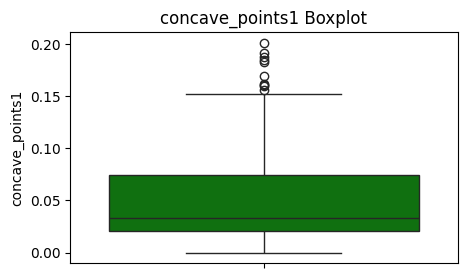

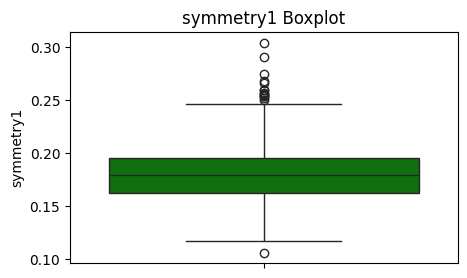

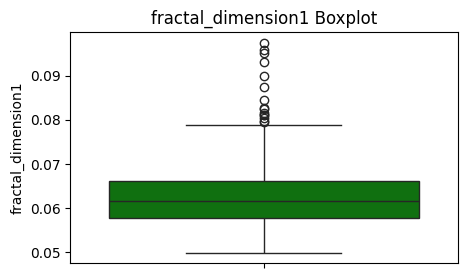

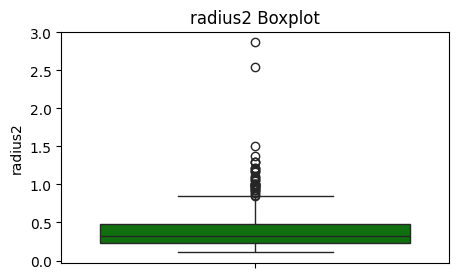

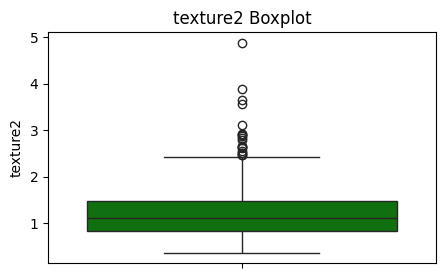

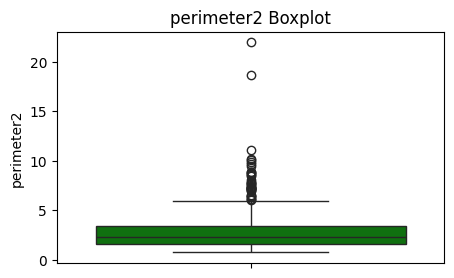

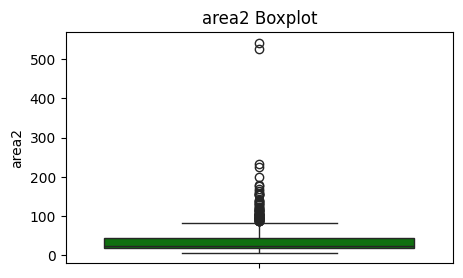

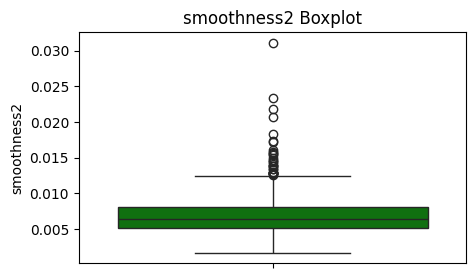

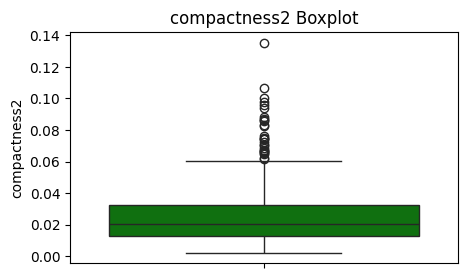

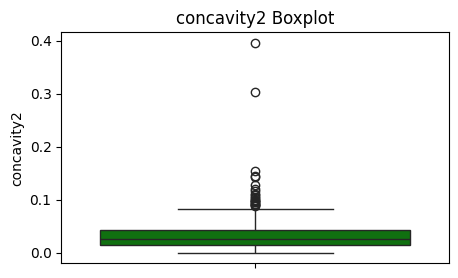

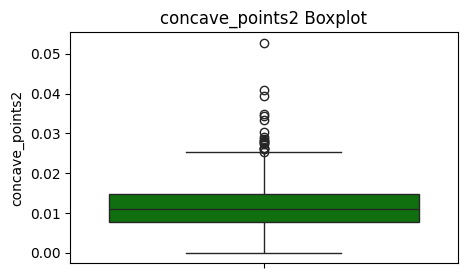

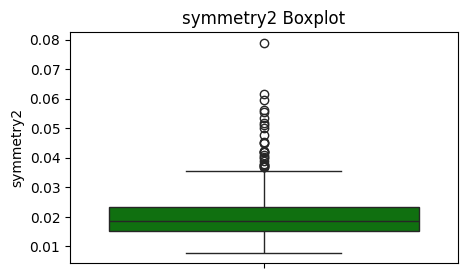

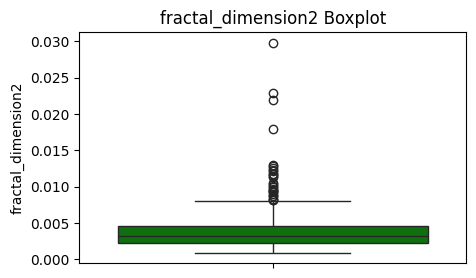

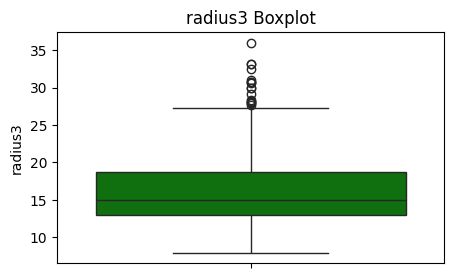

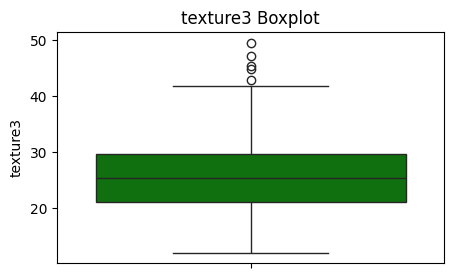

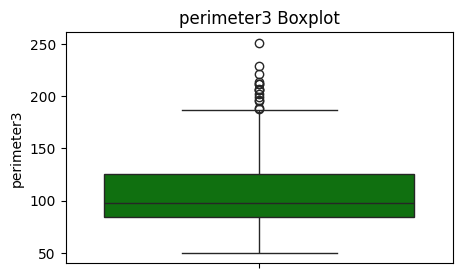

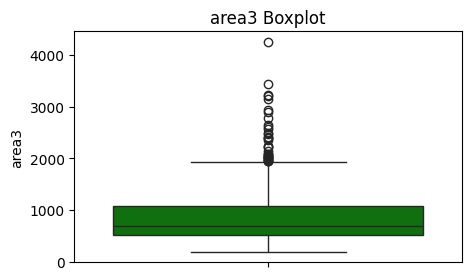

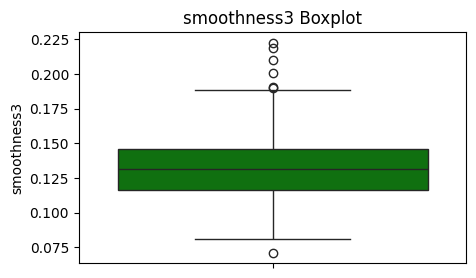

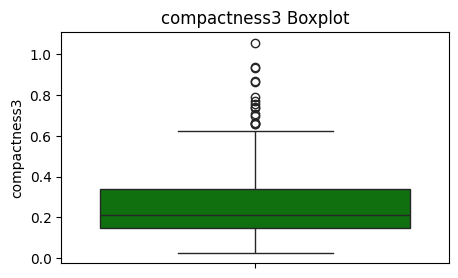

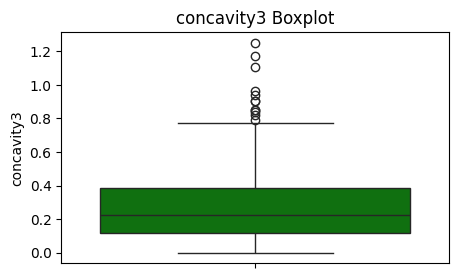

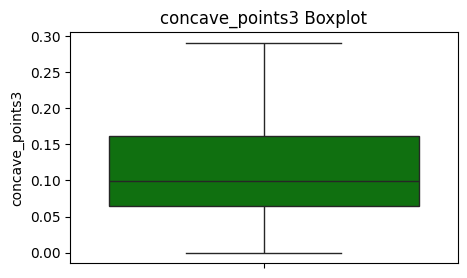

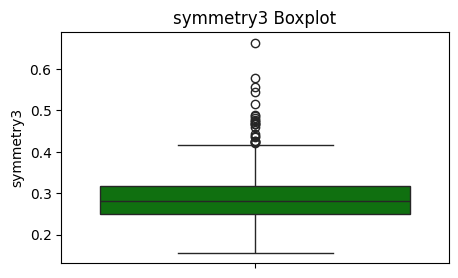

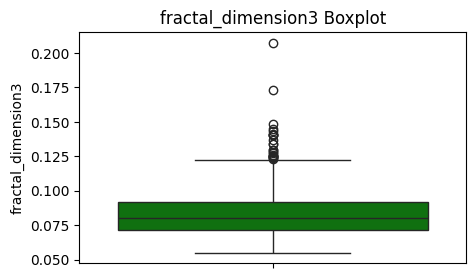

In [ ]:
for col in df.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(df[col], color='green')
    plt.title(f"{col} Boxplot")
    plt.show()

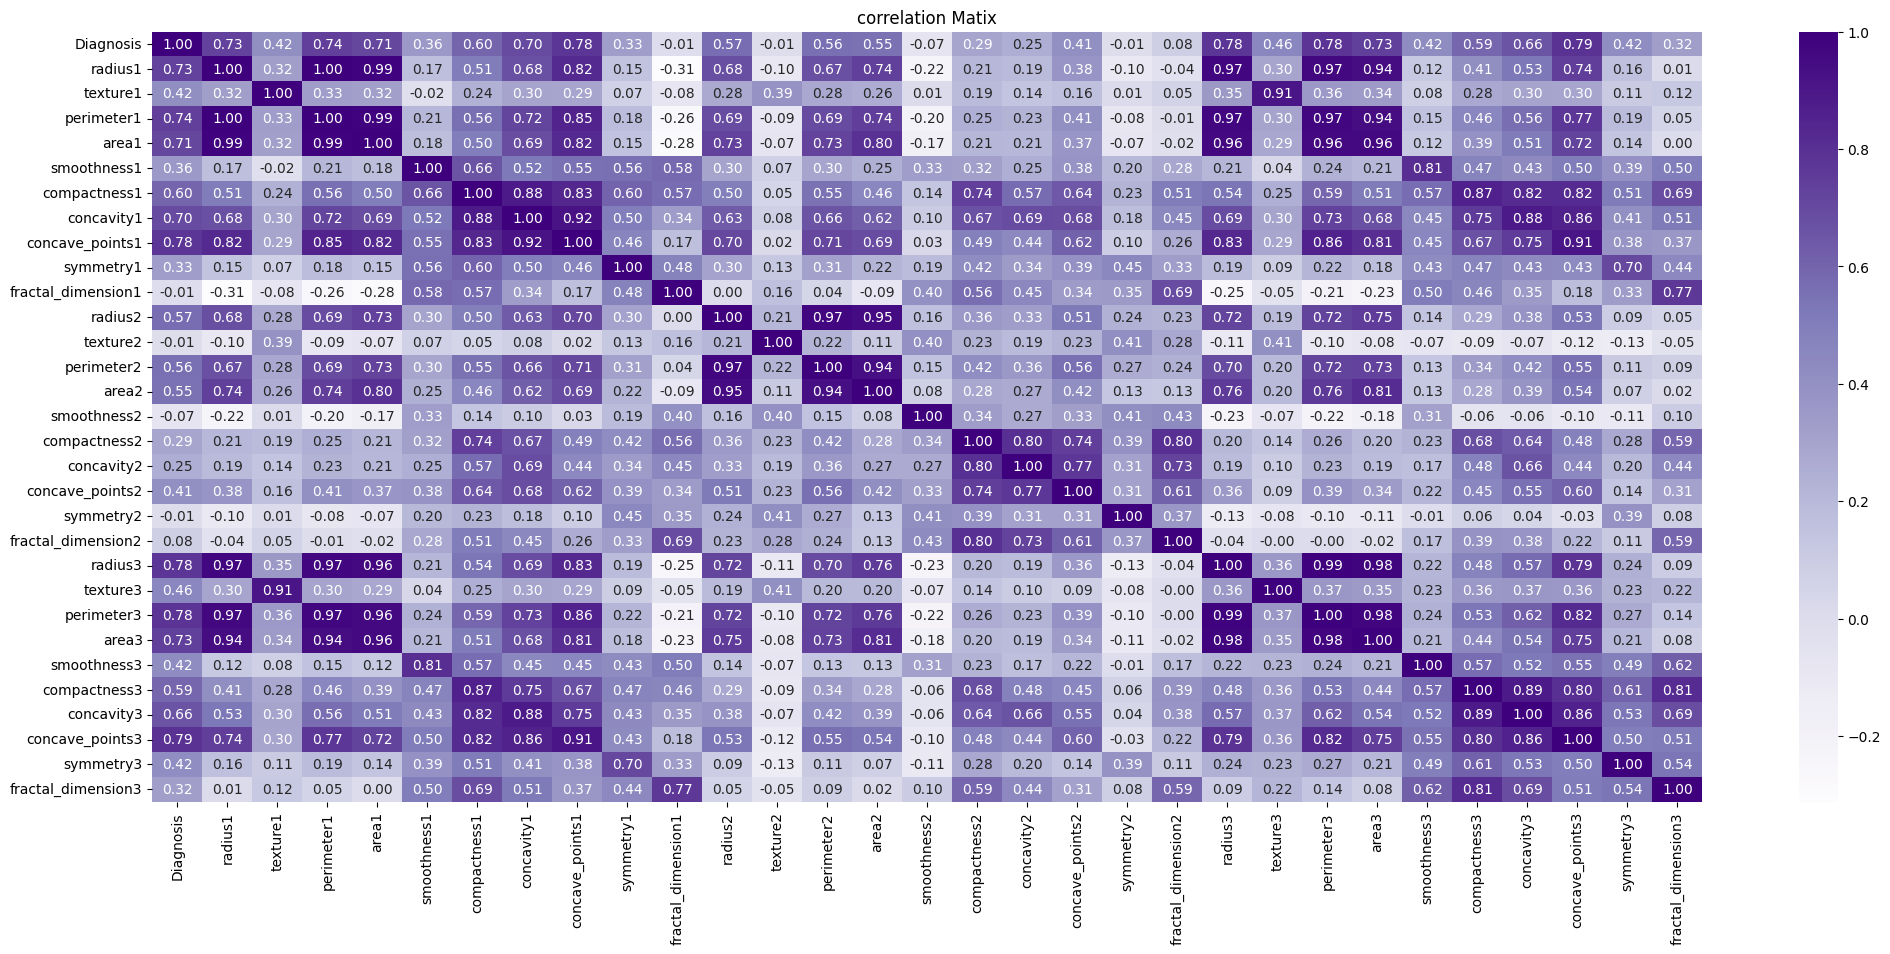

In [ ]:
plt.figure(figsize=(25, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Purples', fmt=".2f")
plt.title("correlation Matix")
plt.show()

# Interprétation
La matrice de corrélation met en évidence les relations linéaires entre les différentes caractéristiques du jeu de données.
On observe plusieurs corrélations très fortes ( > 0.90) entre des variables similaires :
radius1, perimeter1, area1 : corrélation > 0.99
concavity1 et concave_points1 : 0.93
radius3, perimeter3, area3 : très fortes également

Ces fortes corrélations indiquent que certaines variables pourraient être redondantes et qu’on pourrait envisager de réduire la dimensionnalité (via PCA) pour améliorer l'efficacité des modèles.

La variable Diagnosis est particulièrement corrélée positivement avec :

concavity1, concave_points1, radius1, area1, etc.
Cela montre que certaines formes de noyaux cellulaires sont typiquement associées aux tumeurs malignes.



Sur cette partie on se concentre plus sur les données de la variable cible diagnostis :

*  la statistique descriptive Calcule la moyenne et l’écart-type de chaque variable séparément;elle permet de voir les variables plus élevées pour la tumeur maligne.
*   le botplox Compare la distribution de certaines variables pour les deux types de tumeurs.
*   Avec le PCA, on visualises si les tumeurs bénignes et malignes forment des groupes distincts.
*   La matrice de correlation détectes les variables redondantes (très corrélées).







Cette analyse  a permis d’identifier des variables morphologiques fortement discriminantes entre les tumeurs bénignes et malignes.

=== Statistiques descriptives ===
             radius1             texture1            perimeter1             \
                mean       std       mean       std        mean        std   
Diagnosis                                                                    
0          12.146524  1.780512  17.914762  3.995125   78.075406  11.807438   
1          17.462830  3.203971  21.604906  3.779470  115.365377  21.854653   

                area1             smoothness1            ... compactness3  \
                 mean         std        mean       std  ...         mean   
Diagnosis                                                ...                
0          462.790196  134.287118    0.092478  0.013446  ...     0.182673   
1          978.376415  367.937978    0.102898  0.012608  ...     0.374824   

                    concavity3           concave_points3           symmetry3  \
                std       mean       std            mean       std      mean   
Diagnosis                    

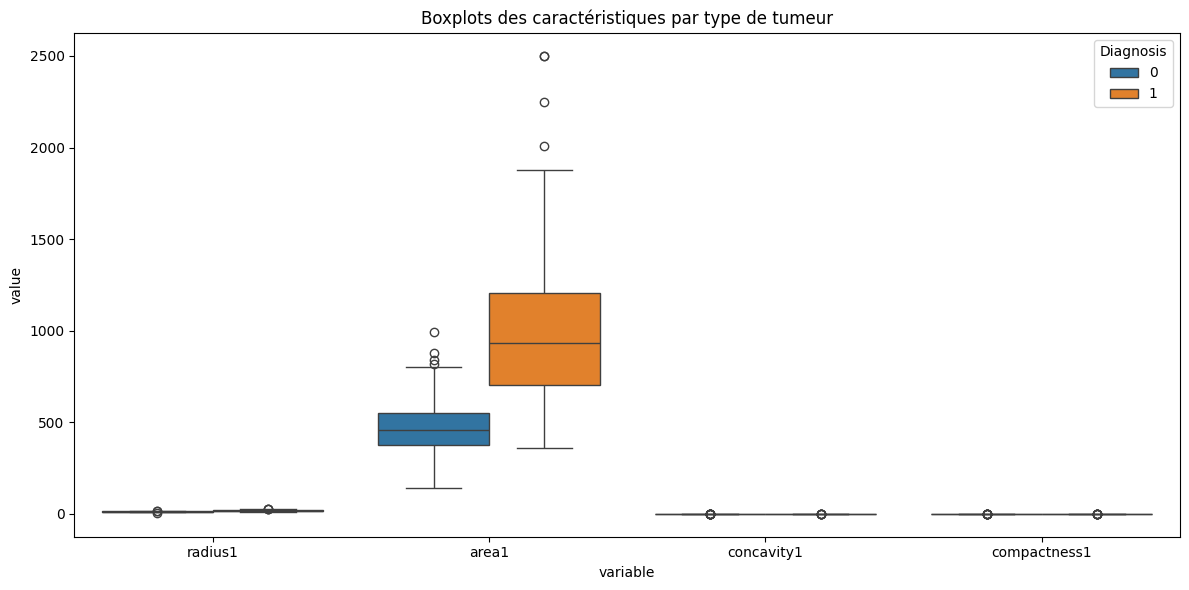

In [ ]:
# Statistiques descriptives par classe
desc_stats = df.groupby('Diagnosis').agg(['mean', 'std'])
print("=== Statistiques descriptives ===")
print(desc_stats)

# Normalisation
features = df.drop(columns=['Diagnosis'])
target = df['Diagnosis']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Boxplots
plt.figure(figsize=(12, 6))
selected_features = ['radius1', 'area1', 'concavity1', 'compactness1']
# Corrected the column name from 'diagnosis' to 'Diagnosis'
df_melted = pd.melt(df, id_vars="Diagnosis", value_vars=selected_features)
sns.boxplot(x="variable", y="value", hue="Diagnosis", data=df_melted)
plt.title("Boxplots des caractéristiques par type de tumeur")
plt.tight_layout()
plt.show()



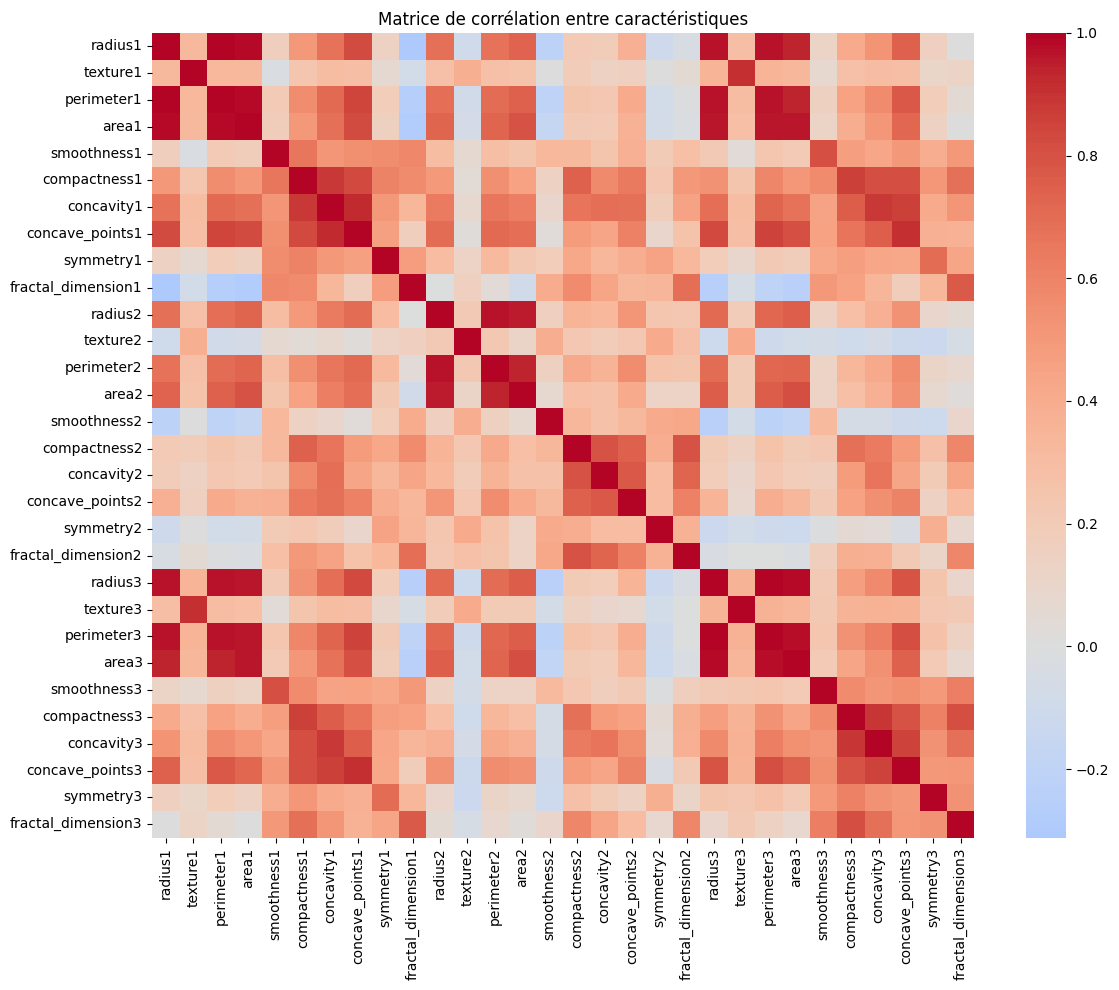

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(12, 10))
corr = df.drop(columns=['Diagnosis']).corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Matrice de corrélation entre caractéristiques")
plt.tight_layout()
plt.show()



le PCA consiste à projeter des données de dimensions supérieures (par exemple 3 dimensions) sur un espace plus petit (par exemple 2 dimensions)

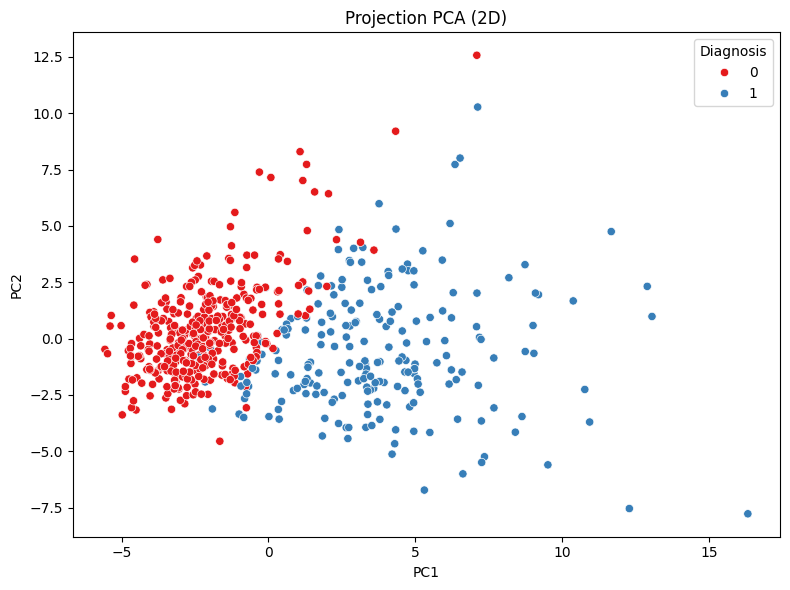

In [ ]:
#  PCA : Analyse en Composantes Principales afin de reduire le nombre de variables dans le jeu de données
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Diagnosis'] = target.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Diagnosis', palette='Set1')
plt.title("Projection PCA (2D)")
plt.tight_layout()
plt.show()



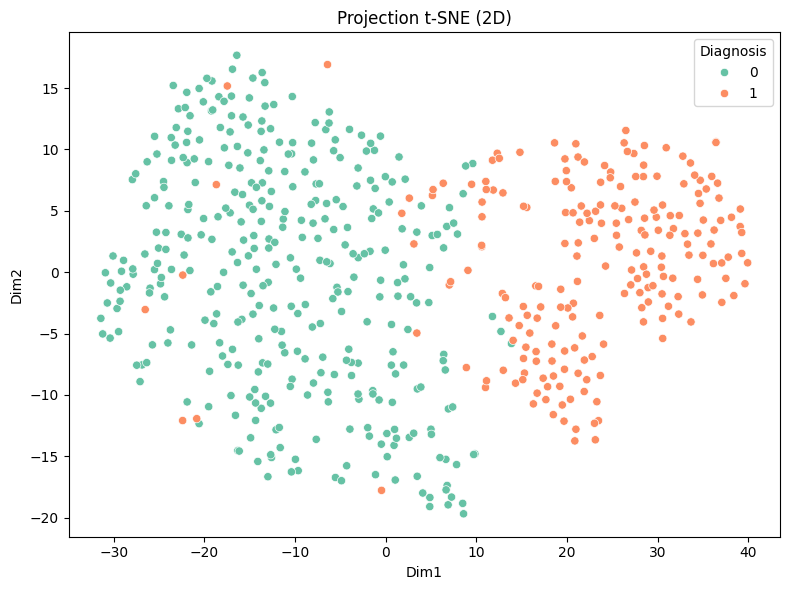

In [ ]:
#  t-SNE: Incrustation Stochastique t-distribuée des Voisins
#afin de visualiser les groupes de données
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)
df_tsne = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])
df_tsne['Diagnosis'] = target.values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue='Diagnosis', palette='Set2')
plt.title("Projection t-SNE (2D)")
plt.tight_layout()
plt.show()

On applique ici l'algorithme de clustering K-Means pour voir si les données morphologiques des noyaux cellulaires se regroupent naturellement en 2 catégories, et si ces catégories correspondent aux diagnostics réels (bénigne/maligne). Cela fait partie aussi de l'analyse exploratoire des données.


 Correspondance entre Clusters KMeans et Diagnostics réels 
Cluster      0    1
Diagnosis          
0          339   18
1           36  176


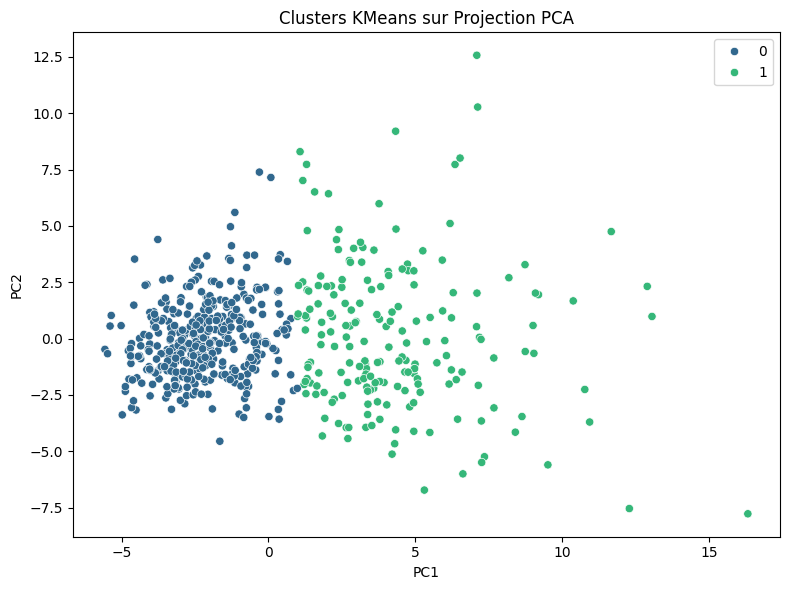

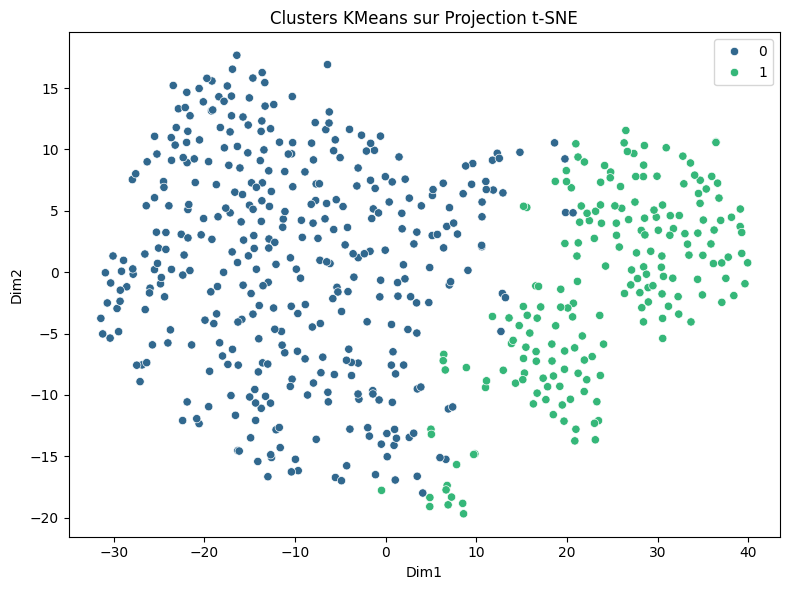

In [ ]:

from sklearn.cluster import KMeans

# Définir le nombre de clusters attendus (ici, 2 : bénigne et maligne)
n_clusters = 2

# Crée et entraîne le modèle KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # n_init pour éviter les avertissements
cluster_labels = kmeans.fit_predict(features_scaled)

# Ajoute les labels de cluster au DataFrame original pour l'analyse
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# Analyse comment les clusters correspondent aux vrais diagnostics
print("\n Correspondance entre Clusters KMeans et Diagnostics réels ")
print(pd.crosstab(df_clustered['Diagnosis'], df_clustered['Cluster']))

# Visualise les clusters sur la projection PCA ou t-SNE
# Sur la projection PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=cluster_labels, palette='viridis')
plt.title("Clusters KMeans sur Projection PCA")
plt.tight_layout()
plt.show()

# Sur la projection t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Dim1', y='Dim2', hue=cluster_labels, palette='viridis')
plt.title("Clusters KMeans sur Projection t-SNE")
plt.tight_layout()
plt.show()

  On peut voir que les points d'une couleur de cluster forment un groupe distinct, et les points de l'autre couleur de cluster forment un autre groupe distinct.
  La visualisation du graphes nous confirme que la structure spatiale des données (telle que capturée par PCA et t-SNE) correspond bien aux clusters trouvés par K-Means.Cela renforce bien l'idée que la structure  des données est alignée avec la classification clinique. Cela montre que même sans dire au modèle où se trouvent les limites entre bénigne et maligne, il parvient à trouver des regroupements qui y correspondent.

On observe le PCA qui  montre une tendance claire à la séparation entre les deux classes, malgré quelques chevauchement entre les données; La projection t-SNE quant à elle montre deux groupes distincts correspondant aux tumeurs bénignes et malignes. Ces visualisations confirment que les caractéristiques morphologiques extraites des noyaux cellulaires permettent de différencier les tumeurs bénignes des tumeurs malignes.Ce qui justifie l’utilisation de modèles de classification supervisée pour automatiser le diagnostic. ces resultats sont bien en accord avec le resultat d'interpretation du clustering algorithme de k-means.

# 3.préparation des données et normalisation pour les modèles

In [ ]:
# Séparer les données en X (variables explicatives) et y (la classe à prédire)
X = df.drop(columns=["Diagnosis"])  # toutes les colonnes sauf la colonne diagnostique
y = df["Diagnosis"]                 # la cible (0 = bénigne, 1 = maligne)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42,shuffle=True
)


# 4.Entrainement du modèle de regression logistique
C'est le modèle de base pour la classification binaire.Il modélise la probabilité d'appartenir à la classe positive en utilisant une fonction sigmoïde.Il nous
servira de base pour comparer les performances des modèles plus complexes.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Création du modèle
model = LogisticRegression(max_iter=1000)

# Entraînement sur les données d'apprentissage
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Prédictions sur X_test
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Rapport de classification (précision, rappel, F1-score)
print("=== Rapport de classification ===")
print(classification_report(y_test, y_pred))

# Matrice de confusion
print("=== Matrice de confusion ===")
print(confusion_matrix(y_test, y_pred))

# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_prob))


=== Rapport de classification ===
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

=== Matrice de confusion ===
[[106   2]
 [  1  62]]
=== AUC ROC ===
0.9980893592004703


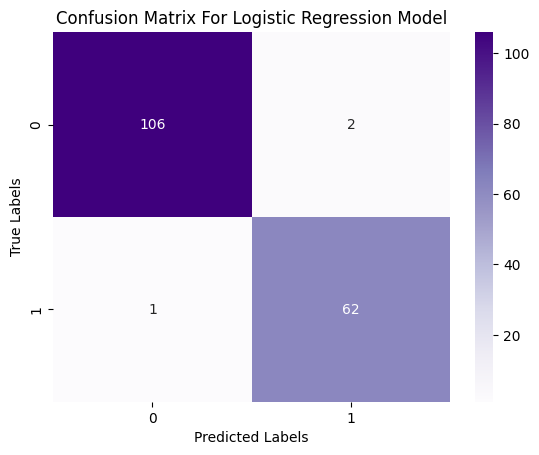

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       107
           1       0.98      0.97      0.98        64

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
cm_lo = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lo, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Logistic Regression Model')
plt.show()
print(classification_report(y_pred, y_test))

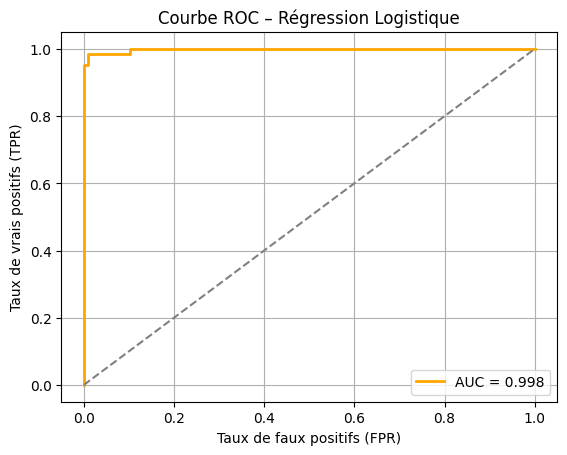

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Prédire les probabilités
y_proba_log = model.predict_proba(X_test)[:, 1]

# Calculer les points ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr_log, tpr_log, color='orange', lw=2, label=f'AUC = {roc_auc_log:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC – Régression Logistique')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Interprétation :
106 vraies bénignes bien classées
2 bénignes classées à tort comme malignes
1 maligne classée à tort comme bénigne
62 vraies malignes bien classées
Seulement 3 erreurs sur 171 exemples.
Score AUC(Receiver Operating Characteristic) entre 0 et 1 qui indique la capacité du modèle à bien séparer les classes.
Le modèle atteint une précision globale de 98 %, avec un F1-score élevé pour les deux classes, et une aire sous la courbe ROC de 0.998, indiquant une excellente capacité de séparation entre les tumeurs bénignes et malignes.

# 5.Comparaison de plusieurs autres modèles:
On entraîne plusieurs algorithmes de machine learning et comparons leurs performances afin  d'identifier le meilleur modèle pour le diagnostic du cancer du sein.
L'abre de decision,Random Forest;Naive Bayes, Réseaux de Neurones, Gradient Boosting, Machines à Vecteurs de Support

# Arbre de decision
 C'est un modèle de machine learning supervisé utilisé pour la classification (comme ici : tumeur bénigne ou maligne).Ce modèle permet de  prendre des décisions séquentielles basées sur les valeurs des caractéristiques.
 Ici:L’arbre de décision a correctement identifié 60 tumeurs bénignes et 101 tumeurs malignes
Il a fait 10 erreurs :
*   3 faux positifs : des tumeurs bénignes classées à tort comme malignes
  
*   7 faux négatifs  : des tumeurs malignes classées comme bénignes (les plus graves)
Ce modèle a une bonne précision (94%) pour
 nous permettre de différencier une tumeur bénigne / maligne
Il est interprétable (on peut visualiser les règles) Mais il est un peu moins performant que la régression logistique









In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Création du modèle
dt_model = DecisionTreeClassifier(random_state=42)

# Entraînement sur les données d'apprentissage
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
#  Prédictions
Y_pred_dt = dt_model.predict(X_test)

#  Accuracy
print("Accuracy :", accuracy_score(y_test, Y_pred_dt))


Accuracy : 0.9415204678362573


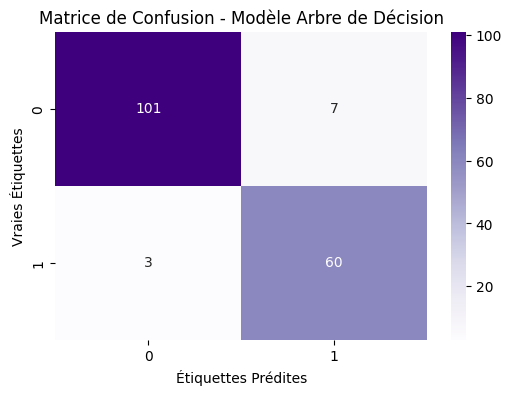

In [ ]:
#  Matrice de confusion
cm_dt = confusion_matrix(y_test, Y_pred_dt)

#  Affichage
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Vraies Étiquettes')
plt.title('Matrice de Confusion - Modèle Arbre de Décision')
plt.show()

In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, Y_pred_dt))

=== AUC ROC ===
0.9437830687830688


In [ ]:
print(classification_report(Y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       104
           1       0.95      0.90      0.92        67

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# Random Forest
 C'est une méthode d'ensemble qui combine plusieurs arbres de décision. Elle réduit le risque de surapprentissage par rapport à un seul arbre.

---


Après un entraînement sur les données, le modèle a atteint une précision de 97,66 % (accuracy).
La matrice de confusion obtenue montre que la majorité des tumeurs ont été correctement classées, avec :
un très faible taux de faux positifs (tumeurs bénignes classées à tort comme malignes),et surtout un très faible taux de faux négatifs, ce qui est essentiel dans un contexte médical où une tumeur maligne non détectée peut avoir des conséquences graves.
La robustesse du modèle provient de sa capacité à combiner plusieurs arbres de décision, ce qui réduit le risque de surapprentissage et améliore la stabilité des prédictions.
En comparaison avec les autres modèles testés :
le Random Forest offre une performance équivalente voire légèrement inférieure à la régression logistique (AUC ≈ 0.97 vs 0.998),
mais reste nettement supérieur à l’arbre de décision seul.


Accuracy : 0.9707602339181286


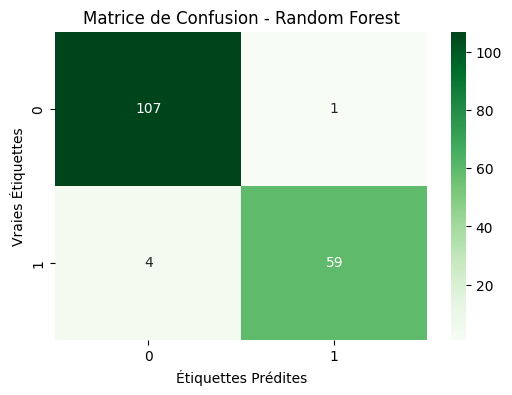

In [ ]:


# modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraînement
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("Accuracy :", accuracy_score(y_test, y_pred_rf))

# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Vraies Étiquettes')
plt.title('Matrice de Confusion - Random Forest')
plt.show()


In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_pred_rf))

=== AUC ROC ===
0.9636243386243386


##  Naives bayes
Le modèle Naive Bayes a été appliqué à notre  jeu de données  afin de prédire le type de tumeur (bénigne ou maligne). Le modèle atteint une précision globale sensiblement égale à 94 %.

L’analyse de la matrice de confusion révèle une bonne capacité à identifier correctement les tumeurs malignes, bien que quelques erreurs subsistent, notamment des faux négatifs. Comparé aux autres modèles testés (régression logistique, arbre de décision, forêt aléatoire), le Naive Bayes offre des performances correctes tout en étant très rapide et léger à exécuter.


Accuracy : 0.935672514619883
Rapport de classification :
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



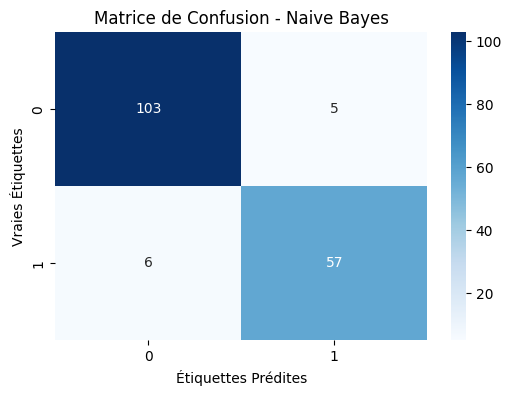

In [ ]:
# Création du modèle
nb_model = GaussianNB()

# Entraînement
nb_model.fit(X_train, y_train)

# Prédiction
y_pred_nb = nb_model.predict(X_test)

# Évaluation
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Rapport de classification :\n", classification_report(y_test, y_pred_nb))

# Matrice de confusion
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Vraies Étiquettes')
plt.title('Matrice de Confusion - Naive Bayes')
plt.show()


In [ ]:
# Score AUC ROC
y_prob = model.predict_proba(X_test)[:, 1]
print("=== AUC ROC ===")
print(roc_auc_score(y_test, y_pred_nb))

=== AUC ROC ===
0.9292328042328042


# Réseaux de Neurones

Un réseau de neurones est un modèle à plusieurs niveaux inspiré du cerveau humain.
Résultats obtenus :
🔹 Courbes d’apprentissage :
Bonne convergence en moins de 10 époques
Pas de surapprentissage visible : validation ≈ entraînement
Validation stable autour de 0.97.
Pour la matrice de confusion :Seulement 4 erreurs sur 171 cas :
3 faux positifs
1 faux négatif.

Nombre de caractéristiques en entrée : 30
=== Structure du Réseau de Neurones ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,289 (48.00 KB)

 Trainable params: 12,289 (48.00 KB)

 Non-trainable params: 0 (0.00 B)


 Entraînement du Réseau de Neurones 
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6443 - loss: 0.6418 - val_accuracy: 0.9750 - val_loss: 0.3530
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8851 - loss: 0.3681 - val_accuracy: 0.9750 - val_loss: 0.2217
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9587 - loss: 0.2158 - val_accuracy: 0.9750 - val_loss: 0.1580
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9230 - loss: 0.2162 - val_accuracy: 0.9750 - val_loss: 0.1268
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9213 - loss: 0.2011 - val_accuracy: 0.9875 - val_loss: 0.1089
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9649 - loss: 0.1332 - val_accuracy: 0.9875 - val_loss: 0.0977
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9456 - loss: 0.1374 - val_accuracy: 0.9750 - val_loss: 0.0924
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.

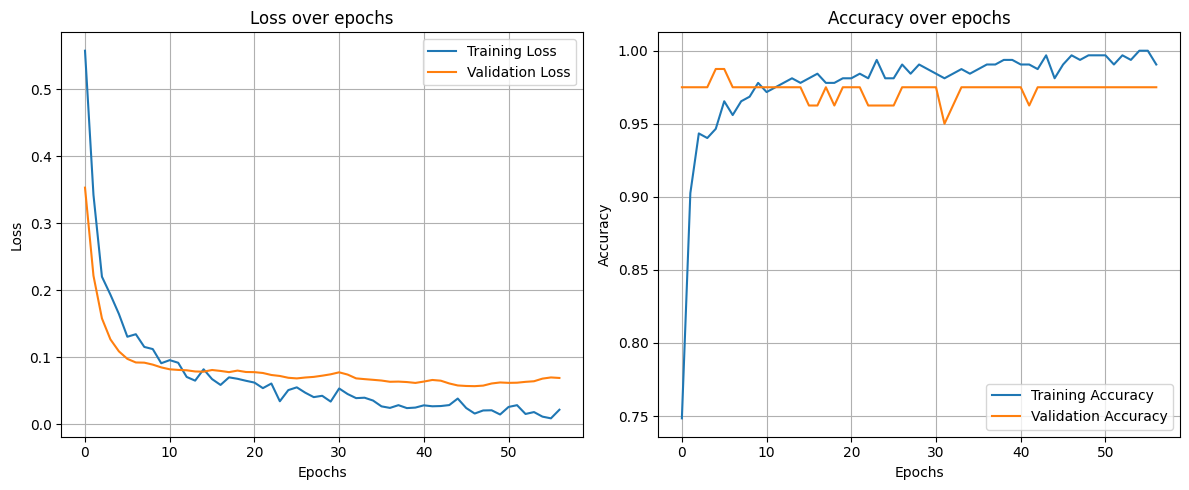


 Évaluation sur l'ensemble de test 
Test Loss: 0.0710
Test Accuracy: 0.9766
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



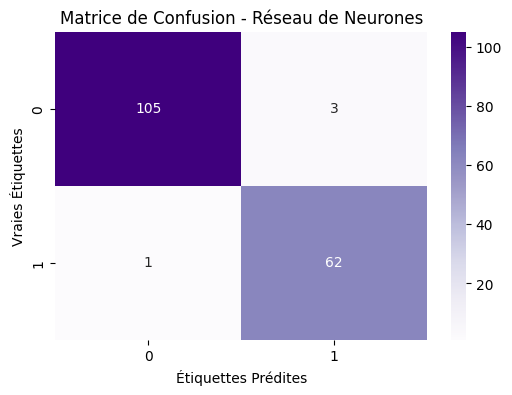

score AUC_ROC
0.9951499118165784


In [ ]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
input_shape = X_train.shape[1]
print(f"Nombre de caractéristiques en entrée : {input_shape}")

nn_model = Sequential()

nn_model.add(Dense(units=128, activation='relu', input_shape=(input_shape,)))

nn_model.add(Dropout(0.5))

nn_model.add(Dense(units=64, activation='relu'))
nn_model.add(Dropout(0.5))

nn_model.add(Dense(units=1, activation='sigmoid'))
print("=== Structure du Réseau de Neurones ===")
nn_model.summary()
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)


print("\n Entraînement du Réseau de Neurones ")
history = nn_model.fit(X_train, y_train,
                       epochs=100,
                       batch_size=32,
                       validation_split=0.2,
                       callbacks=[early_stopping],
                       verbose=1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n Évaluation sur l'ensemble de test ")
loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred_proba_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

print(classification_report(y_test, y_pred_nn))
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Étiquettes Prédites')
plt.ylabel('Vraies Étiquettes')
plt.title('Matrice de Confusion - Réseau de Neurones')
plt.show()

print("score AUC_ROC")
print(roc_auc_score(y_test, y_pred_proba_nn))


# Interpretation des resultats

Le modèle de réseau de neurones entraîné sur le jeu de données Breast Cancer Wisconsin a montré d’excellentes performances pour la classification des tumeurs bénignes et malignes. Avec une précision de 97,66 % et une AUC ROC de 0.995, le modèle démontre une forte capacité de généralisation.

La courbe d’apprentissage montre une bonne stabilité sans surapprentissage. La matrice de confusion indique que très peu de tumeurs malignes ont été mal classées, ce qui est essentiel dans un cadre médical.

Ainsi, le réseau de neurones constitue un modèle robuste, fiable et pertinent pour un système de diagnostic assisté du cancer du sein, en complément du jugement médical.

# Gradient boosting

=== Gradient Boosting ===
Accuracy : 0.9590643274853801
AUC ROC : 0.9951499118165784
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



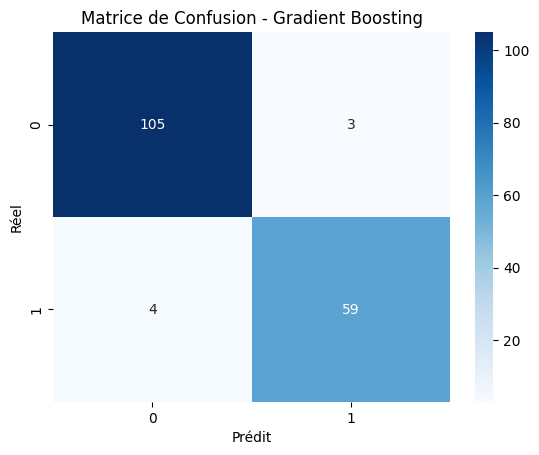

In [ ]:


# Création du modèle Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Entraînement
gb_model.fit(X_train, y_train)

# Prédiction
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Évaluation
print(" Gradient Boosting ")
print("Accuracy :", accuracy_score(y_test, y_pred_gb))
print("AUC ROC :", roc_auc_score(y_test, y_proba_gb))
print(classification_report(y_test, y_pred_gb))

# Matrice de confusion
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Gradient Boosting")
plt.show()


# Machines à Vecteurs de Support (Support Vector Machines - SVM)


=== Support Vector Machine ===
Accuracy : 0.9707602339181286
AUC ROC : 0.9966196355085244
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



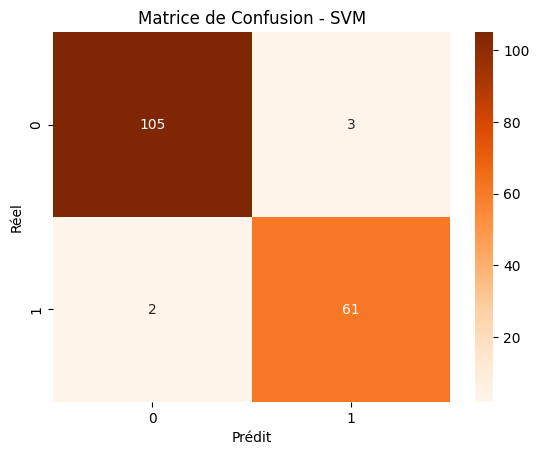

In [ ]:
from sklearn.svm import SVC

# Création du modèle SVM avec calcul de probabilité pour ROC
svm_model = SVC(probability=True, random_state=42)

# Entraînement
svm_model.fit(X_train, y_train)

# Prédiction
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Évaluation
print("\nSupport Vector Machine ")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("AUC ROC :", roc_auc_score(y_test, y_proba_svm))
print(classification_report(y_test, y_pred_svm))

# Matrice de confusion
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - SVM")
plt.show()


# Interprétation des modèle gradient boosting et svm
Les modèles Gradient Boosting et SVM ont été évalués  pour la détection de tumeurs malignes. Le modèle SVM atteint une précision de 97.08 % avec un score AUC de 0.996, surpassant légèrement le Gradient Boosting (accuracy : 95.91 %, AUC : 0.995).

La matrice de confusion du SVM montre une très bonne capacité de généralisation, avec peu de faux positifs et un taux de faux négatifs relativement faible.



# Comparaison des modèles utilisés
La** régression logistique** est étonnamment le meilleur modèle, avec un excellent compromis entre simplicité et performance.

Le réseau de neurones et le SVM sont très performants, avec des scores proches de 98 %, mais plus complexes à expliquer.

Les modèles Random Forest et Gradient Boosting donnent aussi d’excellents résultats tout en offrant une bonne capacité d’interprétation (importance des variables).

Les modèles Naive Bayes et Arbre de Décision seul sont moins performants, mais utiles comme baseline ou pour une interprétation simple.

# Conclusion Générale
Ce projet visait à analyser les caractéristiques morphologiques des noyaux cellulaires issues de biopsies mammaires pour développer un système de diagnostic automatisé du cancer du sein.

En utilisant le jeu de données Breast Cancer Wisconsin (Diagnostic), plusieurs modèles de classification supervisée ont été comparés. Les résultats montrent que la régression logistique offre des performances remarquables (accuracy = 98 %, AUC = 0.998), surpassant même des modèles plus complexes tels que les réseaux de neurones ou le SVM.

Ces performances indiquent une très bonne capacité de séparation entre tumeurs bénignes et malignes, avec un taux d’erreurs très faible, ce qui est crucial en contexte médical.

En conclusion, ce travail met en évidence l’intérêt de l’analyse morphologique assistée par intelligence artificielle pour améliorer la détection précoce du cancer du sein. Le modèle final pourrait être intégré dans un outil de soutien au diagnostic médical, tout en conservant une interprétabilité suffisante pour les professionnels de santé.

Le modèle final retenu est la régression logistique, pour sa robustesse, son interprétabilité et ses excellentes performances (accuracy de 98 % et AUC ROC de 0.998).

Pour valider la fiabilité du modèle, plusieurs méthodes peuvent être mises en place :

la validation croisée pour garantir la stabilité sur le jeu actuel,

l’application à un autre jeu de données médical pour tester la généralisation,

et l’analyse des erreurs pour détecter d’éventuels biais ou cas limites.

Ces étapes assurent que le modèle ne se contente pas d'apprendre le dataset, mais qu’il est capable de généraliser à de nouveaux patients, ce qui est essentiel pour une application en diagnostic médical.

## Comment utiliser mon modèle maching learning pour predire sur des données réelles si un sein est cancereux ou pas:
on entre en données des caractéristique du sein sous la même forme que nos données entrainée. Une fois entraîné, le modèle peut être utilisé pour prédire automatiquement si une nouvelle observation (issue d’une biopsie) correspond à une tumeur bénigne ou maligne.
En fournissant les caractéristiques morphologiques d’un sein sain, le modèle est capable de reconnaître l’absence de cancer, car il a appris à différencier les profils typiques des cellules cancéreuses des normales;et il utilises les lignes de codes suivantes pour predire la classe: if probabilité > 0.5 → classé comme cancer (1)
else → bénin (0)

